# GDP and Population Changes Since 2017

Has the pattern of GDP and US population changed at all between the periods of 2017-2020 and 2021-present?
Let's look and see...

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
gdp = pd.read_excel('US_GDP.xlsx', sheet_name='gdp')
change = pd.read_excel('US_GDP.xlsx', sheet_name='change')
population = pd.read_excel('US_GDP.xlsx', sheet_name='population')
annual = pd.read_excel('US_GDP.xlsx', sheet_name='annual_gdp')

In [72]:
SELECT
	(year || ' ' || quarter) AS quarter,
	gdp
FROM gdp

,quarter,gdp
0,2017 Q1,19280.1
1,2017 Q2,19438.6
2,2017 Q3,19692.6
3,2017 Q4,20037.1
4,2018 Q1,20328.6
5,2018 Q2,20580.9
6,2018 Q3,20798.7
7,2018 Q4,20917.9
8,2019 Q1,21104.1
9,2019 Q2,21384.8


## Absolute GDP Growth

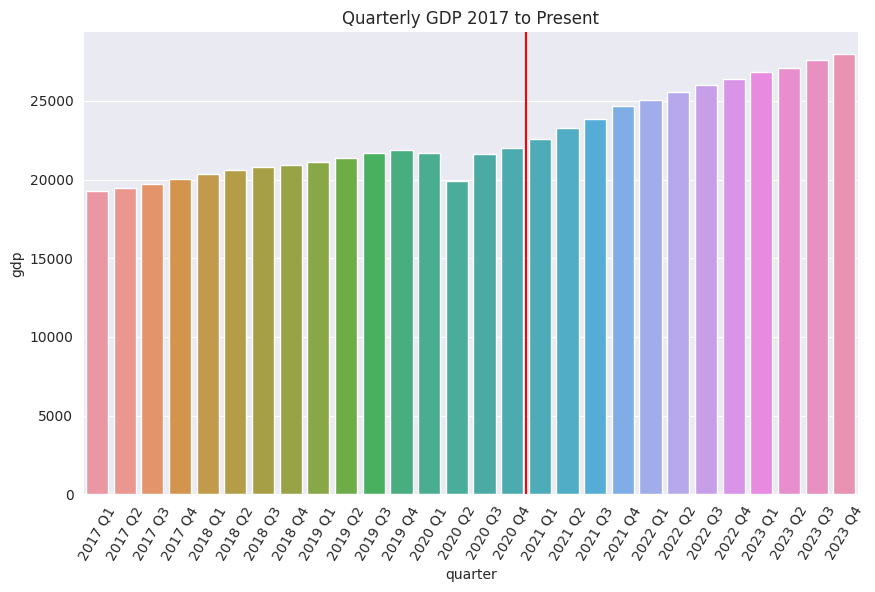

In [73]:
with sns.axes_style(style='darkgrid'):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(data=df_gdp, x='quarter', y='gdp')
    plt.title('Quarterly GDP 2017 to Present')
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticklabels(df_gdp['quarter'], rotation=60)
    ax.axvline(x=15.5, color='r')
plt.show()

The plot above makes it look like 2021 to present has a steeper GDP growth rate. Let's see if we can confirm that...

## Change in GDP Growth

In [74]:
SELECT 
	year || ' ' || quarter AS quarter,
	gdp AS change_gdp
FROM change

,quarter,change_gdp
0,2017 Q1,2.0
1,2017 Q2,2.3
2,2017 Q3,3.2
3,2017 Q4,4.6
4,2018 Q1,3.3
5,2018 Q2,2.1
6,2018 Q3,2.5
7,2018 Q4,0.6
8,2019 Q1,2.2
9,2019 Q2,3.4


In [75]:
df_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   quarter     28 non-null     object 
 1   change_gdp  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


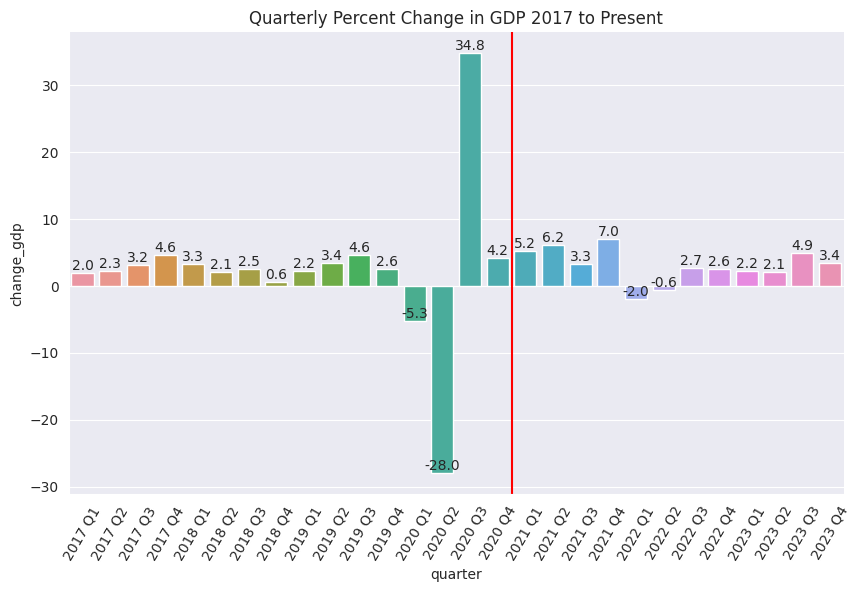

In [76]:
with sns.axes_style(style='darkgrid'):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = sns.barplot(data=df_change, x='quarter', y='change_gdp', ax=ax)
    plt.title('Quarterly Percent Change in GDP 2017 to Present')
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticklabels(df_gdp['quarter'], rotation=60)
    ax.axvline(x=15.5, color='r')
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom', mouseover=True)
plt.show()

The Covid pandemic threw a huge wrench into the dataset with the giant drop followed by recovery in 2020. Although it still looks like 2021 to present has higher growth overall. I'll calculate the compound annual growth rate of each period so we can see a definitive value...

In [77]:
# define a cagr function
def cagr(begin_value, end_value, n):
    return (end_value / begin_value) ** (1/n) - 1

# retrieve the gdp values 
value_2017 = df_gdp.loc[df_gdp['quarter'] == '2017 Q1', 'gdp'].values[0]
value_2020 = df_gdp.loc[df_gdp['quarter'] == '2020 Q4', 'gdp'].values[0]
value_2021 = df_gdp.loc[df_gdp['quarter'] == '2021 Q1', 'gdp'].values[0]
value_2023 = df_gdp.loc[df_gdp['quarter'] == '2023 Q4', 'gdp'].values[0]

# apply the function to the 2 periods and print the results
cagr_1 = cagr(value_2017, value_2020, 16)
cagr_2 = cagr(value_2021, value_2023, 12)
print(f"The CAGR for 2017-2020 is {cagr_1 * 100:.2f}%")
print(f"The CAGR for 2021-2023 is {cagr_2 * 100:.2f}%")

The CAGR for 2017-2020 is 0.84%
The CAGR for 2021-2023 is 1.79%


In [78]:
gdp_cagr = pd.DataFrame({'period': ['2017-2020', '2021-2023'],
                        'cagr': [0.84, 1.79]})
gdp_cagr

,period,cagr
0,2017-2020,0.84
1,2021-2023,1.79


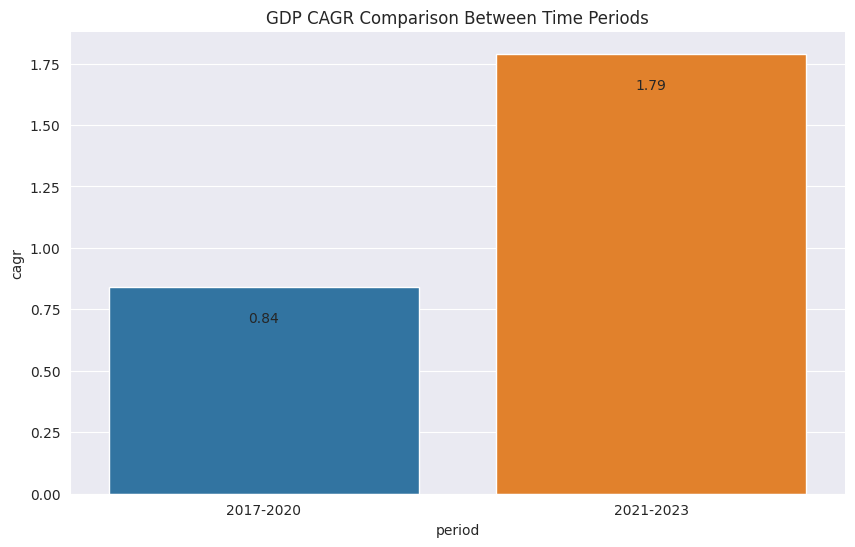

In [79]:
with sns.axes_style(style='darkgrid'):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = sns.barplot(data=gdp_cagr, x='period', y='cagr')
    plt.title('GDP CAGR Comparison Between Time Periods')
    ax.spines[['top', 'right']].set_visible(False)
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.1, round(yval, 2), ha='center', va='top')
plt.show()

2021-2023 has over a double CAGR than the 2017-2020 period. 

In [80]:
SELECT *
FROM population
WHERE year > 2016

,year,population,growth
0,2024,341814420,0.0053
1,2023,339996563,0.0050
2,2022,338289857,0.0038
3,2021,336997624,0.0031
4,2020,335942003,0.0049
5,2019,334319671,0.0066
6,2018,332140037,0.0071
7,2017,329791231,0.0079


## Absolute Population Growth

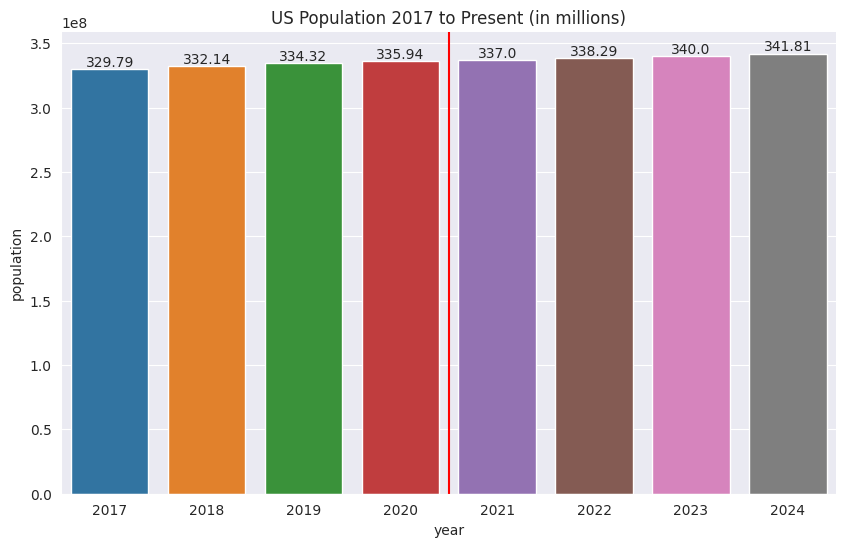

In [81]:
with sns.axes_style(style='darkgrid'):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = sns.barplot(data=df_pop, x='year', y='population')
    plt.title('US Population 2017 to Present (in millions)')
    ax.spines[['top', 'right']].set_visible(False)
    ax.axvline(x=3.5, color='r')
    for bar in bars.patches:
        yval = bar.get_height() / 1000000
        plt.text(bar.get_x() + bar.get_width() / 2, yval * 1000000, round(yval, 2), ha='center', va='bottom', mouseover=True)
plt.show()

## Change in Population Growth

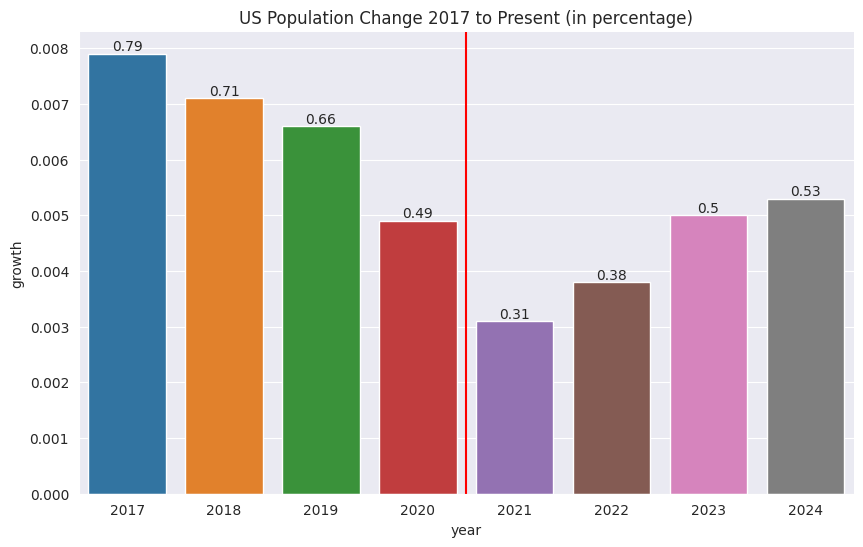

In [82]:
with sns.axes_style(style='darkgrid'):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = sns.barplot(data=df_pop, x='year', y='growth')
    plt.title('US Population Change 2017 to Present (in percentage)')
    ax.spines[['top', 'right']].set_visible(False)
    ax.axvline(x=3.5, color='r')
    for bar in bars.patches:
        yval = bar.get_height() * 100
        plt.text(bar.get_x() + bar.get_width() / 2, yval / 100, round(yval, 2), ha='center', va='bottom')
plt.show()

We can use the same compound annual growth rate calculation on population also...

In [83]:
pop_2017 = df_pop.loc[df_pop['year'] == 2017, 'population'].values[0]
pop_2020 = df_pop.loc[df_pop['year'] == 2020, 'population'].values[0]
pop_2021 = df_pop.loc[df_pop['year'] == 2021, 'population'].values[0]
pop_2023 = df_pop.loc[df_pop['year'] == 2023, 'population'].values[0]

cagr_11 = cagr(pop_2017, pop_2020, 4)
cagr_22 = cagr(pop_2021, pop_2023, 3)
print(f"The CAGR for 2017-2020 is {cagr_11 * 100:.2f}%")
print(f"The CAGR for 2021-2023 is {cagr_22 * 100:.2f}%")

The CAGR for 2017-2020 is 0.46%
The CAGR for 2021-2023 is 0.30%


So, it looks like the population growth slowed down slightly in 2021-2023 as compared to 2017-2020. 

Next, let's look at the GDP per capita calculations

## Absolute GDP per capita Growth

In [84]:
SELECT 
	annual.year,
	annual.gdp,
	population.population,
	ROUND((annual.gdp * 1000000000) / population.population, 0) AS gdp_capita
FROM annual
LEFT JOIN population
	ON annual.year = population.year
ORDER BY annual.year

,year,gdp,population,gdp_capita
0,2017,19612.1,329791231,59468.0
1,2018,20656.5,332140037,62192.0
2,2019,21521.4,334319671,64374.0
3,2020,21323.0,335942003,63472.0
4,2021,23594.0,336997624,70012.0
5,2022,25744.1,338289857,76101.0
6,2023,27360.9,339996563,80474.0


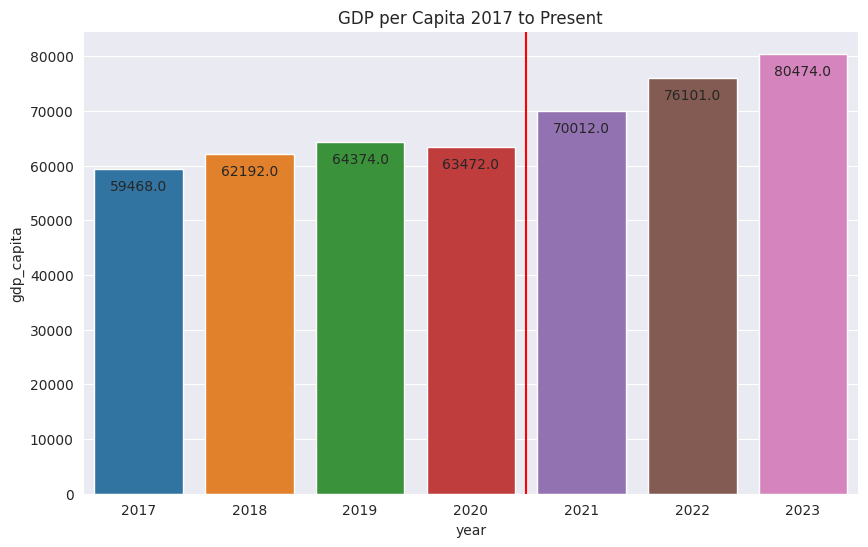

In [85]:
with sns.axes_style(style='darkgrid'):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = sns.barplot(data=df_capita, x='year', y='gdp_capita')
    plt.title('GDP per Capita 2017 to Present')
    ax.spines[['top', 'right']].set_visible(False)
    ax.axvline(x=3.5, color='r')
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 2000, round(yval, 2), ha='center', va='top')
plt.show()

In [86]:
SELECT *,
	ROUND(gdp_capita / LAG(gdp_capita) OVER (ORDER BY year) - 1, 3) AS capita_change
FROM df_capita

,year,gdp,population,gdp_capita,capita_change
0,2017,19612.1,329791231,59468.0,NaN
1,2018,20656.5,332140037,62192.0,0.046
2,2019,21521.4,334319671,64374.0,0.035
3,2020,21323.0,335942003,63472.0,-0.014
4,2021,23594.0,336997624,70012.0,0.103
5,2022,25744.1,338289857,76101.0,0.087
6,2023,27360.9,339996563,80474.0,0.057


## Change in GDP per Capita Growth

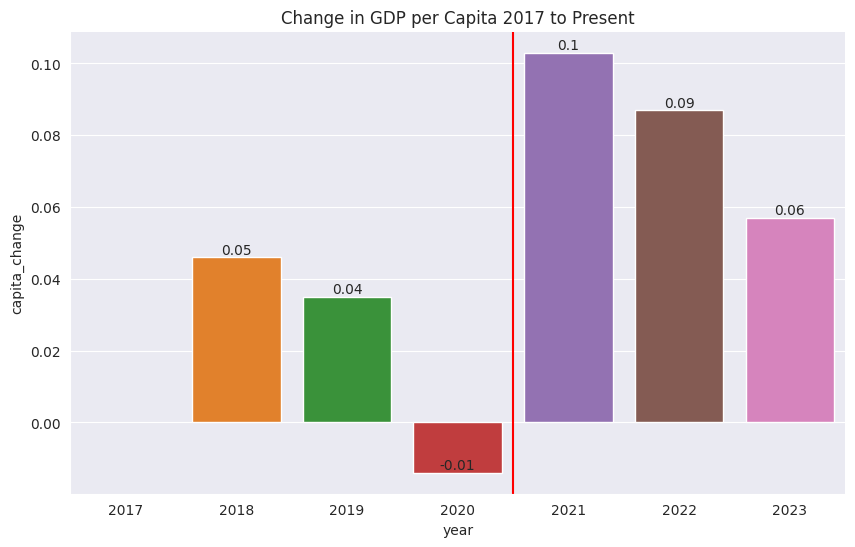

In [91]:
with sns.axes_style(style='darkgrid'):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = sns.barplot(data=df_change, x='year', y='capita_change')
    plt.title('Change in GDP per Capita 2017 to Present')
    ax.spines[['top', 'right']].set_visible(False)
    ax.axvline(x=3.5, color='r')
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [93]:
cap_2017 = df_change.loc[df_change['year'] == 2017, 'gdp_capita'].values[0]
cap_2020 = df_change.loc[df_change['year'] == 2020, 'gdp_capita'].values[0]
cap_2021 = df_change.loc[df_change['year'] == 2021, 'gdp_capita'].values[0]
cap_2023 = df_change.loc[df_change['year'] == 2023, 'gdp_capita'].values[0]

cagr_111 = cagr(cap_2017, cap_2020, 4)
cagr_222 = cagr(cap_2021, cap_2023, 3)
print(f"The CAGR for 2017-2020 is {cagr_111 * 100:.2f}%")
print(f"The CAGR for 2021-2023 is {cagr_222 * 100:.2f}%")

The CAGR for 2017-2020 is 1.64%
The CAGR for 2021-2023 is 4.75%


# Conclusions

GDP: 2017-2020 GDP growth is 0.84%, 2021-2023 growth is 1.79%.

Population: 2017-2020 population growth is 0.46%, 2021-2023 growth is 0.30%

GDP per capita: 2017-2020 growth in GDP per capita is 1.64%, 2021-2023 growth is 4.75%

This data shows that while population growth slowed in the 2021-2023 period, GDP growth increased at a faster rate. The GDP per capita growth rate highlights this result.



## Sources

https://www.macrotrends.net/global-metrics/countries/USA/united-states/population

https://www.bea.gov/data/gdp/gross-domestic-product